#  Task 8: K-Means Clustering on Mall Customers
## Objective:
Perform **unsupervised learning** using K-Means clustering on a customer dataset to segment customers into distinct groups.

- Dataset: Mall_Customers.csv
- Tools Used: `pandas`, `matplotlib`, `seaborn`, `sklearn`


In [1]:
# 📥 1. Load and Explore Dataset
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\susan\\Downloads\\archive (5)\\Mall_Customers.csv")

# Display first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Check shape and info
print("Shape:", df.shape)
df.info()


Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# Check for missing values
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##  Data Cleaning and Selection
We will only use numerical features relevant for customer segmentation.


In [4]:
# Select only numerical features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##  2. Data Visualization
Let’s understand how the customers are distributed in terms of income and spending.


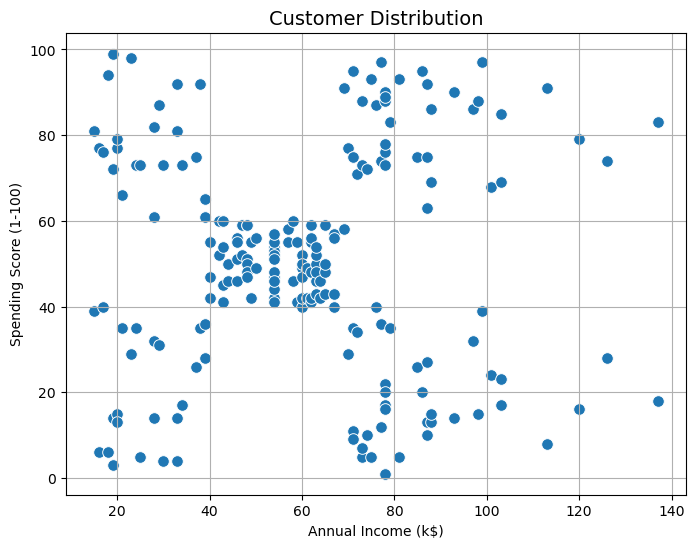

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=70)
plt.title("Customer Distribution", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()


##  3. Elbow Method to Determine Optimal Clusters (K)
We use inertia (WCSS) to decide the best number of clusters.


C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

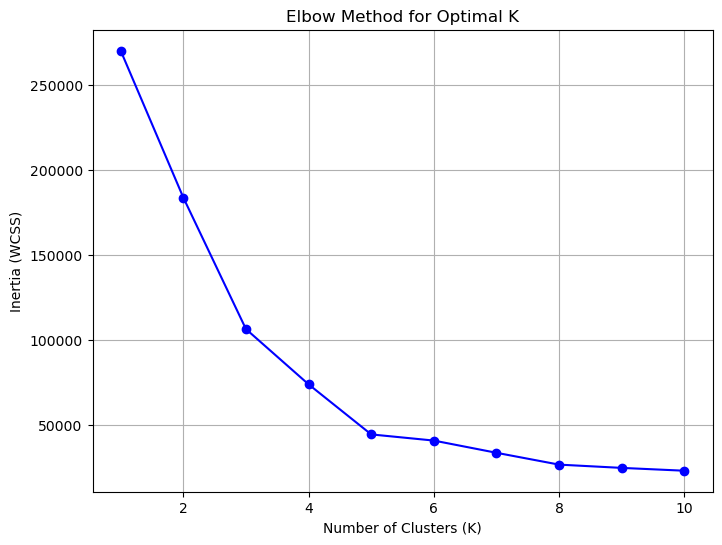

In [6]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


##  4. Apply K-Means with Optimal K = 5
From the Elbow graph, we choose K=5.


In [7]:
# Fit model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster to dataset
df['Cluster'] = y_kmeans
df.head()


C:\Users\susan\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


##  5. Visualize Final Clusters
We’ll plot customers and their cluster assignments.


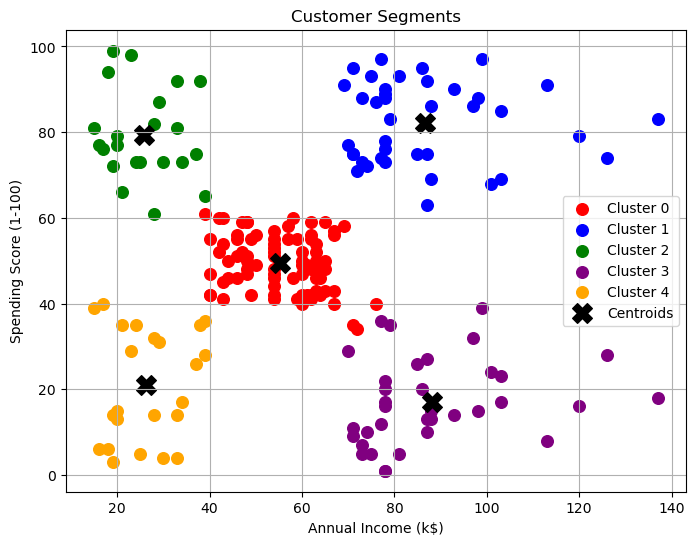

In [8]:
# Visualize clusters
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=70, c=colors[i], label=f'Cluster {i}')
    
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


##  6. Cluster Evaluation - Silhouette Score
Silhouette score measures how well the data points fit into their clusters.


In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.554


#  Conclusion

- **K-Means** effectively segmented the customers into **5 clusters**.
- The **Silhouette Score** confirms the quality of clustering.
- Visualizations helped identify spending behavior based on income.
